In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
cnx=sqlite3.connect('DSCI6002_prj1_data.db')
df=pd.read_sql_query('SELECT*FROM PRJ1',cnx)
fdf=pd.DataFrame(df)
fdf.columns=['Index','EducationStatus','Age']
fdf

,Index,EducationStatus,Age
0,0,Less than HS,26.0
1,1,Less than HS,43.8
2,2,Less than HS,34.4
3,3,Less than HS,76.2
4,4,Less than HS,0.2
...,...,...,...
1166,1166,Graduate,52.7
1167,1167,Graduate,59.8
1168,1168,Graduate,54.1
1169,1169,Graduate,39.9


In [334]:
dataMapping ={'Less than HS':0, 'HS':1, 'Jr Coll':2, "Bachelor's":3, 'Graduate':4}
fdf['NEducationStatus']=fdf['EducationStatus'].map(dataMapping)
fdf

,Index,EducationStatus,Age,NEducationStatus
0,0,Less than HS,26.0,0
1,1,Less than HS,43.8,0
2,2,Less than HS,34.4,0
3,3,Less than HS,76.2,0
4,4,Less than HS,0.2,0
...,...,...,...,...
1166,1166,Graduate,52.7,4
1167,1167,Graduate,59.8,4
1168,1168,Graduate,54.1,4
1169,1169,Graduate,39.9,4


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


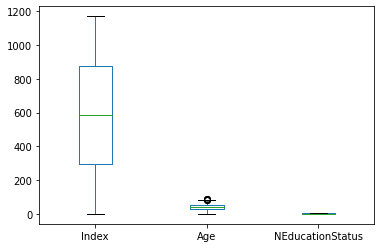

In [335]:
fdf.boxplot(column=["Index","Age","NEducationStatus"],grid=False)

In [336]:
d_melt=fdf.melt(id_vars=['NEducationStatus','EducationStatus'],value_vars='Age')
d_melt.columns=['NEducationStatus','EducationStatus','Description','Age']

In [337]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model =ols('Age ~ C(EducationStatus)', data=d_melt).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.460
Date:                Sat, 19 Nov 2022   Prob (F-statistic):            0.00140
Time:                        23:53:00   Log-Likelihood:                -4790.7
No. Observations:                1160   AIC:                             9591.
Df Residuals:                    1155   BIC:                             9617.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             42.1306      0.950     44.360      0.000      40.267      43.994
C(EducationStatus)[T.Graduate]         1.4819      1.545      0.959      0.338      -1.550       4.514
C(EducationStatus)[T.HS]              -2.0075      1.150     -1.746      0.081      -4.263       0.249
C(EducationStatus)[T.Jr Coll]         -1.1264      1.808     -0.623      0.533      -4.674       2.421
C(EducationStatus)[T.Less than HS]    -5.6017      1.682     -3.331      0.001      -8.901      -2.302
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.649
Skew:                           0.035   Prob(JB):                        0.723
Kurtosis:                       2.907   Cond. No.                         6.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
anova_table=sm.stats.anova_lm(model,type=2)
print(anova_table)

                        df         sum_sq      mean_sq         F    PR(>F)
C(EducationStatus)     4.0    4054.648874  1013.662219  4.459536  0.001402
Residual            1155.0  262534.002678   227.302167       NaN       NaN


In [339]:
esq_sm=anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
anova_table['EtaSq']=[esq_sm,'NaN']
print(anova_table)

                        df         sum_sq      mean_sq         F    PR(>F)  \
C(EducationStatus)     4.0    4054.648874  1013.662219  4.459536  0.001402   
Residual            1155.0  262534.002678   227.302167       NaN       NaN   

                       EtaSq  
C(EducationStatus)  0.015209  
Residual                 NaN  


In [340]:
pair_t=model.t_test.pairwise('C(EducationStatus)')
pair_t.result_frame

AttributeError: ignored

In [342]:
mc=sm.stats.multicomp.MultiComparison(d_melt['Age'],d_melt['EducationStatus'])
mc_results=mc.tukeyhsd()
print(mc_results)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1      group2    meandiff p-adj  lower upper reject
----------------------------------------------------------
Bachelor's     Graduate      nan 0.5566   nan   nan  False
Bachelor's           HS      nan 0.5566   nan   nan  False
Bachelor's      Jr Coll      nan 0.5566   nan   nan  False
Bachelor's Less than HS      nan 0.5566   nan   nan  False
  Graduate           HS      nan 0.5566   nan   nan  False
  Graduate      Jr Coll      nan 0.5566   nan   nan  False
  Graduate Less than HS      nan 0.5566   nan   nan  False
        HS      Jr Coll      nan 0.5566   nan   nan  False
        HS Less than HS      nan 0.5566   nan   nan  False
   Jr Coll Less t

In [301]:
mc=sm.stats.multicomp.MultiComparison(d_melt['Age'],d_melt['NEducationStatus'])
mc_results=mc.tukeyhsd()
print(mc_results)



NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     0      1      nan 0.5566   nan   nan  False
     0      2      nan 0.5566   nan   nan  False
     0      3      nan 0.5566   nan   nan  False
     0      4      nan 0.5566   nan   nan  False
     1      2      nan 0.5566   nan   nan  False
     1      3      nan 0.5566   nan   nan  False
     1      4      nan 0.5566   nan   nan  False
     2      3      nan 0.5566   nan   nan  False
     2      4      nan 0.5566   nan   nan  False
     3      4      nan 0.5566   nan   nan  False
------------------------------------------------


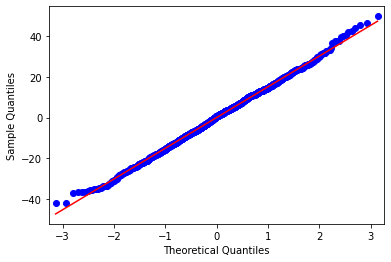

In [343]:
res=model.resid
fig=sm.qqplot(res,line='s')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


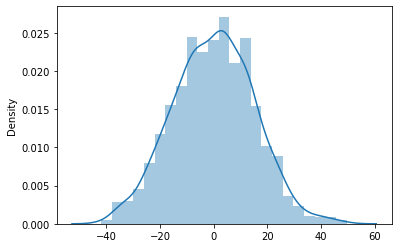

In [344]:
from seaborn.distributions import distplot
import seaborn as sns
sns.distplot(res,bins='auto',hist=True)

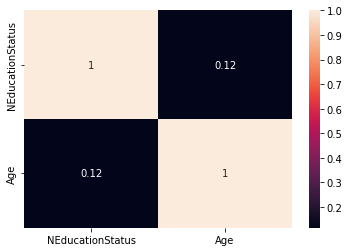

In [351]:
#relationship analysis
corelation=d_melt.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

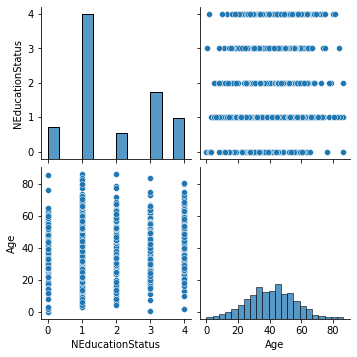

In [350]:
sns.pairplot(d_melt)

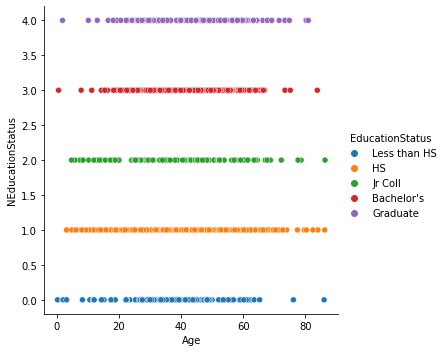

In [349]:
sns.relplot(x= "Age",hue= "EducationStatus",y="NEducationStatus",data=d_melt)

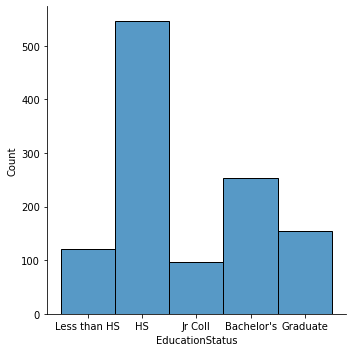

In [352]:
sns.displot(d_melt['EducationStatus'])

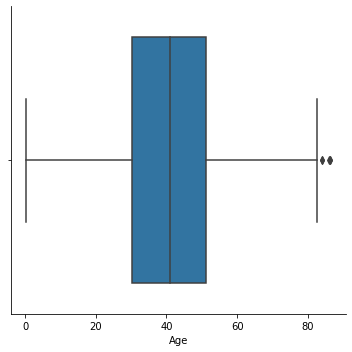

In [353]:
sns.catplot(x='Age',kind="box",data=d_melt)